# 城市气候与海洋的关系研究

导入包

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression

import pandas as pd
from pandas import Series,DataFrame

城市信息：citis = np.array(['asti','bologna','cesena','faenza','ferrara','mantova','milano','piacenza','ravenna','torino'])

In [2]:
citis = np.array(['asti','bologna','cesena','faenza','ferrara','mantova','milano','piacenza','ravenna','torino'])

导入数据各个海滨城市数据

In [3]:
milano = pd.read_csv('milano_150715.csv')
milano

,Unnamed: 0,temp,humidity,pressure,description,dt,wind_speed,wind_deg,city,day,dist
0,0,28.57,54,1016,Sky is Clear,1436863175,2.1,100,Milano,2015-07-14 10:39:35,250
1,1,29.74,48,1016,Sky is Clear,1436866758,2.6,0,Milano,2015-07-14 11:39:18,250
2,2,31.12,48,1016,Sky is Clear,1436870509,2.6,140,Milano,2015-07-14 12:41:49,250
3,3,32.16,45,1015,Sky is Clear,1436874098,2.1,0,Milano,2015-07-14 13:41:38,250
4,4,33.59,43,1015,Sky is Clear,1436877644,3.1,80,Milano,2015-07-14 14:40:44,250
5,5,34.21,36,1014,Sky is Clear,1436881329,2.1,0,Milano,2015-07-14 15:42:09,250
6,6,34.41,38,1014,Sky is Clear,1436884928,2.1,230,Milano,2015-07-14 16:42:08,250
7,7,34.81,38,1014,Sky is Clear,1436888512,3.1,220,Milano,2015-07-14 17:41:52,250
8,8,34.09,38,1013,Sky is Clear,1436892131,2.6,210,Milano,2015-07-14 18:42:11,250
9,9,33.20,35,1014,Sky is Clear,1436895722,4.1,210,Milano,2015-07-14 19:42:02,250


In [6]:
data = {}
for city in citis:
    df1 = pd.read_csv('%s_150715.csv'%(city))
    df2 = pd.read_csv('%s_250715.csv'%(city))
    df3 = pd.read_csv('%s_270615.csv'%(city))
    
#     合并数据，级联,默认级联方向行，样本
    df = pd.concat([df1,df2,df3],axis = 0,ignore_index=True)
    data[city] = df

查看行数

In [7]:
data['milano']

,Unnamed: 0,temp,humidity,pressure,description,dt,wind_speed,wind_deg,city,day,dist
0,0,28.57,54,1016,Sky is Clear,1436863175,2.1,100,Milano,2015-07-14 10:39:35,250
1,1,29.74,48,1016,Sky is Clear,1436866758,2.6,0,Milano,2015-07-14 11:39:18,250
2,2,31.12,48,1016,Sky is Clear,1436870509,2.6,140,Milano,2015-07-14 12:41:49,250
3,3,32.16,45,1015,Sky is Clear,1436874098,2.1,0,Milano,2015-07-14 13:41:38,250
4,4,33.59,43,1015,Sky is Clear,1436877644,3.1,80,Milano,2015-07-14 14:40:44,250
5,5,34.21,36,1014,Sky is Clear,1436881329,2.1,0,Milano,2015-07-14 15:42:09,250
6,6,34.41,38,1014,Sky is Clear,1436884928,2.1,230,Milano,2015-07-14 16:42:08,250
7,7,34.81,38,1014,Sky is Clear,1436888512,3.1,220,Milano,2015-07-14 17:41:52,250
8,8,34.09,38,1013,Sky is Clear,1436892131,2.6,210,Milano,2015-07-14 18:42:11,250
9,9,33.20,35,1014,Sky is Clear,1436895722,4.1,210,Milano,2015-07-14 19:42:02,250


去除没用的行

In [8]:
for key,df in data.items():
    data[key] = df.drop(labels=['Unnamed: 0'],axis = 1)

In [9]:
data['milano']

,temp,humidity,pressure,description,dt,wind_speed,wind_deg,city,day,dist
0,28.57,54,1016,Sky is Clear,1436863175,2.1,100,Milano,2015-07-14 10:39:35,250
1,29.74,48,1016,Sky is Clear,1436866758,2.6,0,Milano,2015-07-14 11:39:18,250
2,31.12,48,1016,Sky is Clear,1436870509,2.6,140,Milano,2015-07-14 12:41:49,250
3,32.16,45,1015,Sky is Clear,1436874098,2.1,0,Milano,2015-07-14 13:41:38,250
4,33.59,43,1015,Sky is Clear,1436877644,3.1,80,Milano,2015-07-14 14:40:44,250
5,34.21,36,1014,Sky is Clear,1436881329,2.1,0,Milano,2015-07-14 15:42:09,250
6,34.41,38,1014,Sky is Clear,1436884928,2.1,230,Milano,2015-07-14 16:42:08,250
7,34.81,38,1014,Sky is Clear,1436888512,3.1,220,Milano,2015-07-14 17:41:52,250
8,34.09,38,1013,Sky is Clear,1436892131,2.6,210,Milano,2015-07-14 18:42:11,250
9,33.20,35,1014,Sky is Clear,1436895722,4.1,210,Milano,2015-07-14 19:42:02,250


各城市与海洋距离，最高温度，最低温度，最高湿度，最低湿度

In [10]:
data['milano'].head()

,temp,humidity,pressure,description,dt,wind_speed,wind_deg,city,day,dist
0,28.57,54,1016,Sky is Clear,1436863175,2.1,100,Milano,2015-07-14 10:39:35,250
1,29.74,48,1016,Sky is Clear,1436866758,2.6,0,Milano,2015-07-14 11:39:18,250
2,31.12,48,1016,Sky is Clear,1436870509,2.6,140,Milano,2015-07-14 12:41:49,250
3,32.16,45,1015,Sky is Clear,1436874098,2.1,0,Milano,2015-07-14 13:41:38,250
4,33.59,43,1015,Sky is Clear,1436877644,3.1,80,Milano,2015-07-14 14:40:44,250


In [11]:
infos = []
for key,df in data.items():
    dist = df['dist'][0]
    
    temp_max = df['temp'].max()
    temp_min = df['temp'].min()
    temp_mean = df['temp'].mean()
    
    humidity_max = df['humidity'].max()
    humidity_min = df['humidity'].min()
    humidity_mean  = df['humidity'].mean()
    
    info = [key,dist,temp_max,temp_min,temp_mean,humidity_max,humidity_min,humidity_mean]
    infos.append(info)

In [14]:
# 将转化成DataFrame
df = DataFrame(infos,
               columns=['城市','距离','最高温度','最低温度','平均温度','最高湿度','最低湿度','平均湿度'])
df.set_index('城市',inplace=True)
df

,距离,最高温度,最低温度,平均温度,最高湿度,最低湿度,平均湿度
城市,,,,,,,
asti,315,34.31,18.01,26.216176,93,29,63.132353
bologna,71,33.85,18.44,27.242353,92,40,61.338235
cesena,14,32.81,18.41,26.820294,100,61,77.647059
faenza,37,32.74,18.62,27.038806,100,61,81.074627
ferrara,47,33.43,18.81,27.390735,85,39,61.308824
mantova,121,34.18,19.03,27.643676,100,28,59.147059
milano,250,34.81,18.28,26.705303,100,35,56.984848
piacenza,200,33.92,18.68,27.018529,100,35,59.308824
ravenna,8,32.79,18.22,26.948636,94,34,68.015152


显示最高温度与离海远近的关系

Text(0,0.5,'最高温度')

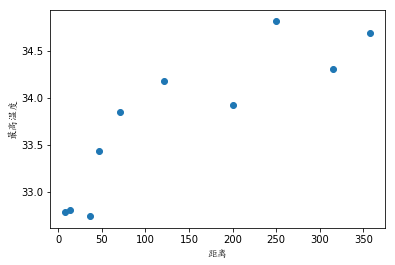

In [20]:
plt.scatter(df['距离'],df['最高温度'])

plt.xlabel('距离',fontproperties = 'KaiTi')
plt.ylabel('最高温度',fontproperties = 'KaiTi')

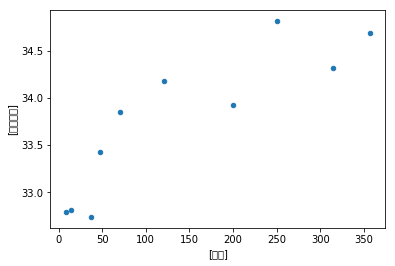

In [18]:
# DataFrame封装方法，考虑没有周全
# plt显示中文，三种设置方法，其他两种设置方法，自学一下
df.plot(x = ['距离'],y = ['最高温度'],kind = 'scatter')

观察发现，离海近的可以形成一条直线，离海远的也能形成一条直线。

首先使用numpy：把列表转换为numpy数组，用于后续计算。

分别以100公里和50公里为分界点，划分为离海近和离海远的两组数据

In [26]:
cond = df['距离'] <100

near = df[cond]

lrg = LinearRegression()

# 算法，X二维
lrg.fit(near[['距离']],near['最高温度'])

w_ = lrg.coef_
b_ = lrg.intercept_
print(w_,b_)

[0.0170871] 32.519116791673056


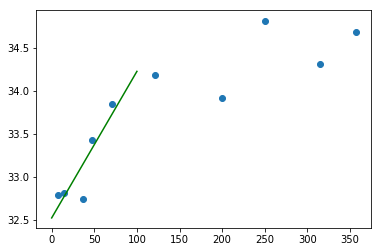

In [27]:
plt.scatter(df['距离'],df['最高温度'])

x = np.linspace(0,100,100)

plt.plot(x,w_[0]*x + b_,color = 'green')

In [29]:
cond = df['距离'] >100

far = df[cond]
far

,距离,最高温度,最低温度,平均温度,最高湿度,最低湿度,平均湿度
城市,,,,,,,
asti,315,34.31,18.01,26.216176,93,29,63.132353
mantova,121,34.18,19.03,27.643676,100,28,59.147059
milano,250,34.81,18.28,26.705303,100,35,56.984848
piacenza,200,33.92,18.68,27.018529,100,35,59.308824
torino,357,34.69,18.94,26.507647,88,45,63.191176


In [30]:
# 再次使用
lrg.fit(far[['距离']],far['最高温度'])

w2_ = lrg.coef_
b2_ = lrg.intercept_


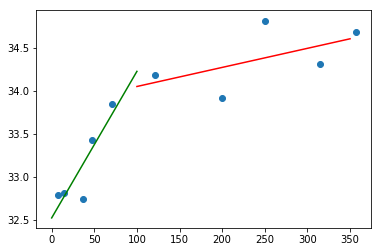

In [31]:
plt.scatter(df['距离'],df['最高温度'])

x = np.linspace(0,100,100)

plt.plot(x,w_[0]*x + b_,color = 'green')


# 远海
x2 = np.linspace(100,350,100)

plt.plot(x2,w2_[0]*x2 + b2_,color = 'r')

使用支持向量机计算回归参数

查看最低温度与海洋距离的关系

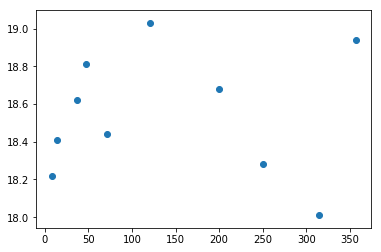

In [32]:
plt.scatter(df['距离'],df['最低温度'])

最低湿度与海洋距离的关系

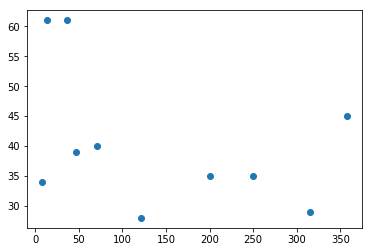

In [33]:
plt.scatter(df['距离'],df['最低湿度'])

最高湿度与海洋距离的关系

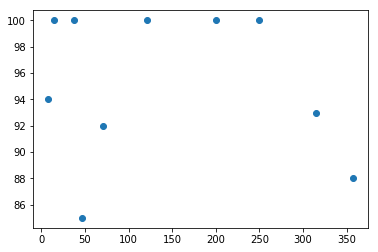

In [34]:
plt.scatter(df['距离'],df['最高湿度'])

平均湿度与海洋距离的关系

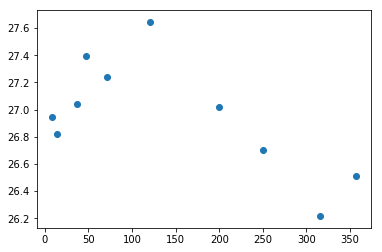

In [37]:
plt.scatter(df['距离'],df['平均温度'])

思考：模仿最高温度，得到平均湿度与海洋距离的回归曲线

风向与风速的关系

在子图中，同时比较风向与湿度和风力的关系

可以看到散点图显示效果不好

由于风向是360度，我们可以考虑使用玫瑰图（极坐标条形图）

首先自定义一个画图函数

In [40]:
wind_deg = data['milano']['wind_deg']

用numpy创建一个直方图，将360度划分为8个面元，将数据分类到这8个面元中

In [43]:
wind_count,wind_range = np.histogram(wind_deg,bins = 8,range = [0,360])
display(wind_count,wind_range)

array([21,  9,  9,  6, 14,  3,  2,  2], dtype=int64)

array([  0.,  45.,  90., 135., 180., 225., 270., 315., 360.])

<BarContainer object of 8 artists>

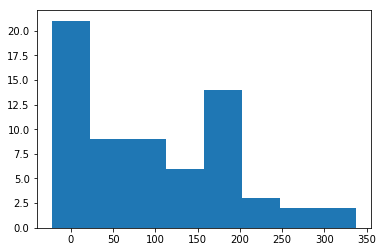

In [46]:
plt.bar(wind_range[:-1],wind_count,width = 45)

<BarContainer object of 8 artists>

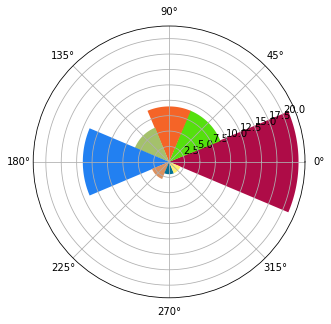

In [49]:
plt.figure(figsize=(5,5))

x = np.arange(0,2*np.pi,np.pi/4)

plt.axes(polar = True)

plt.bar(x,wind_count,color = np.random.rand(8,3))

计算米兰各个方向上的风速

In [52]:
# 0度到45度之间的风速情况：求平局值，中位数
cond = data['milano']['wind_deg'] < 45

data['milano'][cond]

,temp,humidity,pressure,description,dt,wind_speed,wind_deg,city,day,dist
1,29.74,48,1016,Sky is Clear,1436866758,2.6,0,Milano,2015-07-14 11:39:18,250
3,32.16,45,1015,Sky is Clear,1436874098,2.1,0,Milano,2015-07-14 13:41:38,250
5,34.21,36,1014,Sky is Clear,1436881329,2.1,0,Milano,2015-07-14 15:42:09,250
13,26.29,61,1015,scattered clouds,1436910148,0.5,0,Milano,2015-07-14 23:42:28,250
14,25.32,61,1015,few clouds,1436913738,1.0,0,Milano,2015-07-15 00:42:18,250
18,23.64,69,1015,Sky is Clear,1436928077,1.0,0,Milano,2015-07-15 04:41:17,250
21,23.45,65,1016,few clouds,1436938882,1.0,0,Milano,2015-07-15 07:41:22,250
29,34.38,38,1008,Sky is Clear,1437748776,2.6,0,Milano,2015-07-24 16:39:36,250
32,26.67,48,1008,heavy intensity rain,1437759568,2.1,0,Milano,2015-07-24 19:39:28,250
34,25.09,54,1007,scattered clouds,1437766817,0.5,0,Milano,2015-07-24 21:40:17,250


In [55]:
# 45 到90度
cond1 = data['milano']['wind_deg'] >=45

cond2 = data['milano']['wind_deg'] <90
cond = cond1&cond2
data['milano'][cond]

,temp,humidity,pressure,description,dt,wind_speed,wind_deg,city,day,dist
4,33.59,43,1015,Sky is Clear,1436877644,3.1,80,Milano,2015-07-14 14:40:44,250
15,24.23,65,1015,Sky is Clear,1436917310,1.5,70,Milano,2015-07-15 01:41:50,250
16,24.29,65,1015,Sky is Clear,1436920930,1.5,80,Milano,2015-07-15 02:42:10,250
17,23.75,65,1016,Sky is Clear,1436924426,2.6,80,Milano,2015-07-15 03:40:26,250
22,25.67,73,1016,few clouds,1436942515,1.5,60,Milano,2015-07-15 08:41:55,250
25,30.81,45,1011,few clouds,1437734492,2.6,70,Milano,2015-07-24 12:41:32,250
26,31.91,45,1010,proximity shower rain,1437738045,3.1,80,Milano,2015-07-24 13:40:45,250
47,26.37,65,1009,few clouds,1437813633,1.5,70,Milano,2015-07-25 10:40:33,250
62,19.62,72,1017,Sky is Clear,1435456482,2.6,50,Milano,2015-06-28 03:54:42,250


将各个方向的风速保存在列表中

画出各个方向的风速

将上面步骤写成函数